# Assignment 4 - Unsupervised Learning and Neural Networks

## *Tzu-Chun Hsieh*
Netid: th264

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

In [1]:
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

In [2]:
import numpy as np

In [3]:
def kmeans(X, k, max_steps=10, convergence_threshold=10):
    '''kmeans
    
        Input:
            X: matrix of input data where each row represents a sample
            k: number of means to use
            max_steps: maximum number of iterations to run the algorithm
            convergence_threshold: if the means change less than this
                                   value in an iteration, declare convergence
        Output:
            means: a matrix listing the k means
            cluster_assignment: a list of the cluster assignments for each samples
            dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean
    '''
    # run algorithm multiple times to pick the clustering with the lower dissimilarity measure
    iteration = 4
    # variables to record the means, cluster_assignment, and dissimilarity
    k_means_final = []
    cluster_assignment_final = []
    dissimilarity_final = []
    
    for ite in range(iteration):
        # select the first k points at random as initial means
        # set random seed
        np.random.seed((ite+1) * 100)
        
        # sample k points from X
        k_means = X[np.random.choice(X.shape[0], k, replace=False), :]
        
        # initialize a list to record which cluster the observation belongs to
        observation_class = np.linspace(0,0, len(X), dtype = int)
        
        # initialize an array to record the Euclidean distance from each point to each k mean values
        E_distance = np.empty([len(X), k])
        
        dissim_pre = 2147483647
        dissim_curr = 2147483647
        # iterations to run the algorithms
        for step in range(max_steps):
            # initialize dissimilarity variables
            dissim_pre = dissim_curr
            dissim_curr = 0
            
            # calculate the Euclidean distance from each point to each k mean values
            for x_idx, row in enumerate(X):
                # duplicate the row for k times to calculate the distance between each k mean point
                row_ = np.repeat([row], k, axis = 0)
                # calculate the sum of the squared error of Euclidean distance and save it to the E_distance array
                E_distance[x_idx, :] = np.sum(np.multiply((row_ - k_means), (row_ - k_means) ), axis = 1).reshape(1,-1)
                  
                # assign a class for the row to the nearest mean
                observation_class[x_idx] = np.argmin(E_distance[x_idx, :])
                
                # sum up the dissimilarity
                dissim_curr += E_distance[x_idx, observation_class[x_idx]]
        
            # update the centroid of the labeled data
            for k_idx in range(k):
                # choose the rows that are classified as k_idx and calculate the centroid point
                k_means[k_idx, :] = np.mean(X[ (observation_class == k_idx), :], axis = 0).reshape(1, -1)
            
            # check convergence (dissimilarity function)
            if abs(dissim_curr - dissim_pre) < convergence_threshold:
                break
        
        # check whether this model is better than the last one and update the final answers
        # if this is the first model
        if dissimilarity_final == []:
            k_means_final = k_means
            cluster_assignment_final = observation_class
            dissimilarity_final = dissim_curr
        # if this is not the first model, compare it to the best previous model
        # if this model is better, update k_means_final, cluster_assignment_final, dissimilarity_final
        elif dissim_curr < dissimilarity_final:
            k_means_final = k_means
            cluster_assignment_final = observation_class
            dissimilarity_final = dissim_curr
            
    # return answers
    return k_means_final, cluster_assignment_final, dissimilarity_final
            

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

In [4]:
from sklearn.datasets import make_blobs
# create the two datsets
ds1 = make_blobs(n_samples=5000, centers=2, random_state=0)
ds2 = make_blobs(n_samples=5000, centers=5, random_state=0)
# the list of k values 
k_value = np.arange(1,11)

In [5]:
# for dataset 1
# rerun my k-means algorithm for k_values
sum_sqrt_error_ds1 = []
for k in k_value:
    k_means, cluster_assign, dissimilarity = kmeans(ds1[0], k)
    sum_sqrt_error_ds1.append(dissimilarity)


In [6]:
# plot the elbow curve
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(k_value, sum_sqrt_error_ds1, color = 'blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared errors')
plt.title('Elbow curve for dataset 1')
plt.show()

<Figure size 1500x800 with 1 Axes>

The elbow in the curve when k = 2 because the slope of the elbow curve decrease dramatically after k = 2.

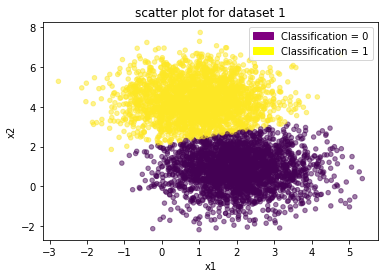

In [7]:
# Plot the data and your 𝑘 -means for the optimal value of  𝑘
ds1_k_best = 2

k, c, d = kmeans(ds1[0], ds1_k_best)
plt.scatter(ds1[0][:, 0], ds1[0][:, 1], c = c, s = 20, alpha = 0.5)
plt.title('scatter plot for dataset 1')
plt.xlabel('x1')
plt.ylabel('x2')

from matplotlib  import patches
purple_patch = patches.Patch(color='purple', label='Classification = 0')
yellow_patch = patches.Patch(color='yellow', label='Classification = 1')
plt.legend(handles=[purple_patch, yellow_patch])
plt.show()

In [8]:
# for dataset 2
# rerun my k-means algorithm for k_values
sum_sqrt_error_ds2 = []
for k in k_value:
    k_means, cluster_assign, dissimilarity = kmeans(ds2[0], k)
    sum_sqrt_error_ds2.append(dissimilarity)

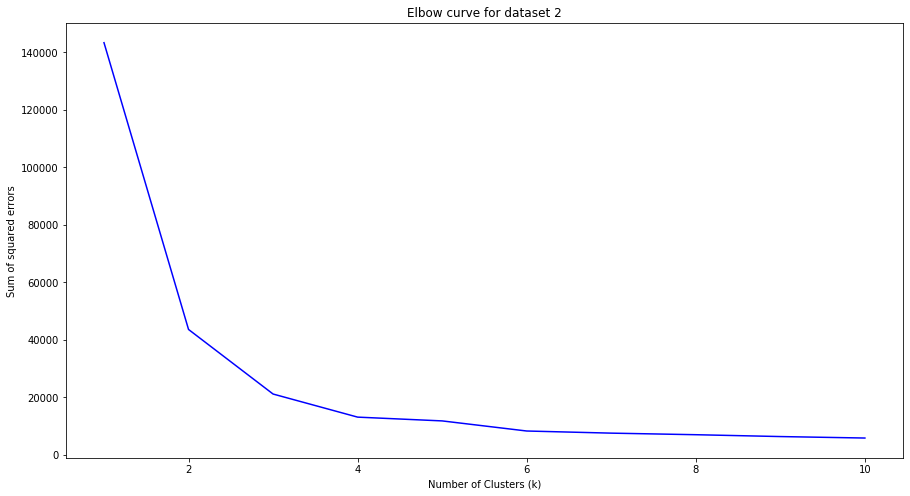

In [9]:
# plot the elbow curve
plt.figure(figsize=(15,8))
plt.plot(k_value, sum_sqrt_error_ds2, color = 'blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared errors')
plt.title('Elbow curve for dataset 2')
plt.show()

The elbow in the curve when k = 4 because the slope of the elbow curve becomes small after k = 4.

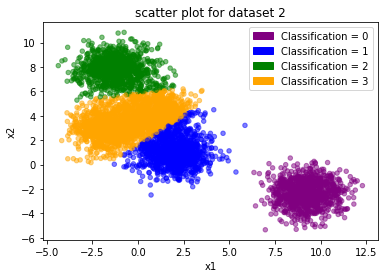

In [10]:
# Plot the data and your 𝑘 -means for the optimal value of  𝑘
ds2_k_best = 4

k, c, d = kmeans(ds2[0], ds2_k_best)

from matplotlib.colors import ListedColormap
cmap_list = ListedColormap(['purple', 'blue', 'green', 'orange'])
plt.scatter(ds2[0][:, 0], ds2[0][:, 1], c = c, cmap= cmap_list, s = 20, alpha = 0.5)
plt.title('scatter plot for dataset 2')
plt.xlabel('x1')
plt.ylabel('x2')

purple_patch = patches.Patch(color='purple', label='Classification = 0')
blue_patch = patches.Patch(color='blue', label='Classification = 1')
green_patch = patches.Patch(color='green', label='Classification = 2')
orange_patch = patches.Patch(color='orange', label='Classification = 3')
plt.legend(handles=[purple_patch, blue_patch, green_patch, orange_patch])
plt.show()

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

->  
(1) k-means: Centroid-based clustering that classifies observations based on the distance between k centroids and the observations. The k centroids and the classification of each observation are determined by the iterating the step of assigning observations to the nearest mean and updating the mean to be the centroid of the labeled data. K-means is unique from other clustering methods because it converges very fast and predicts very well when the clusters have equal variance.   


(2) agglomerative clustering: Hierarchical clustering starts from setting each observation as a unique cluster and iterates the step of grouping the two closest clusters based on the chosen distance metric and linkage criterion. Agglomerative is unique from other clustering methods because we can choose where to "cut" the dendrogram to produce clusters to decide the number of clusters instead of specifying it by the user.   


(3) Gaussian mixture models: Distribution-based clustering that classifies observations based on the probability of being classified as a specific cluster. The probability is calculated based on the weighted average of density functions of each cluster. The Gaussian mixture model is unique from other clustering methods because it can assign a partial classification to the observations based on the probability of being classified as each class.   


(4) DBSCAN: Density-based clustering that classifying observations based on the density of the data points. We set the radius of a neighbor and the number of neighbors for a point to be considered as a core point to assign the observations as core points, border points, and noise points and by grouping the neighboring core points and their border points to find the clusters and outliers. DBSCAN is unique from other clustering methods because the number of clusters is chosen by the algorithm, it can find arbitrarily shaped clusters, and works well to detect outliers.   


(5) spectral clustering: The clustering method that chooses a method to create an affinity matrix, conducts principal component analysis to reduce the dimension of the affinity matrix, then applies traditional clustering technics on these features to separate observations into k clusters. Spectral clustering is unique from other clustering methods because we don't have assumptions about data such as Gaussian distribution, low variation in cluster density, and etc., which makes it possible to produces good clustering results.

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (c) run each of them on the four datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

In [11]:
# read all the data needed
df_names = ['Aggregation.txt', 'Compound.txt', 'D31.txt', 'jain.txt']
df_list = []
for file_name in df_names:
    df_list.append(np.genfromtxt(file_name, delimiter='\t', usecols = (0,1)))

# overview of clustering methods: https://scikit-learn.org/stable/modules/clustering.html
# import the 5 cluster models in sklearn
from sklearn.cluster import KMeans #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import AgglomerativeClustering #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.mixture import GaussianMixture #https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
from sklearn.cluster import DBSCAN #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import SpectralClustering #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

Q1d_k_value = np.arange(1,11)

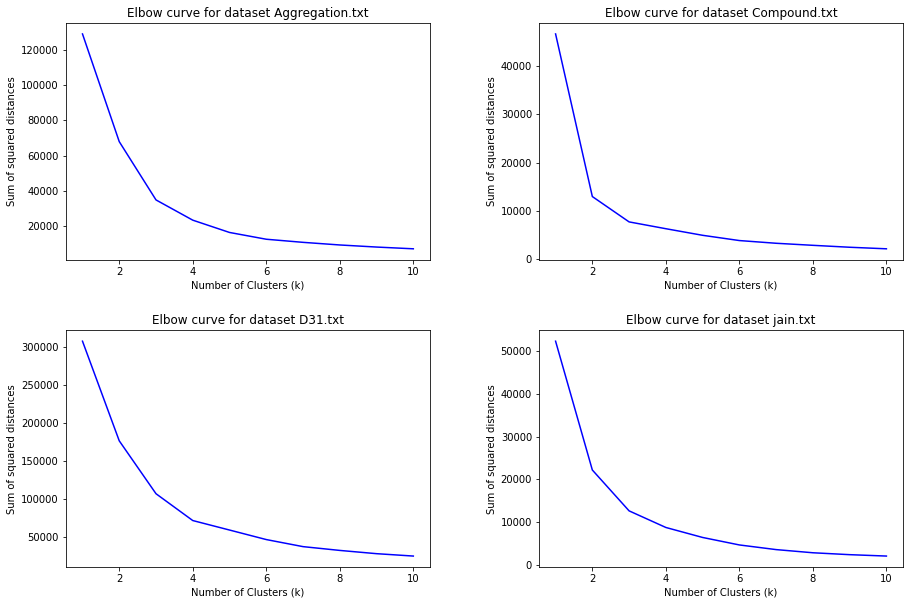

In [12]:
# k-means
# tune argument "n_clusters" to decide the optimal model by elbow curve 
# create an array to record the cost of the models for each combination of dataset and k
Q1d_kmeans_sum_sqrt_dis = np.empty([len(df_list), len(Q1d_k_value)])

# calculate the cost for each model
for row, data in enumerate(df_list):
    for k in Q1d_k_value:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        Q1d_kmeans_sum_sqrt_dis[row, k-1] = kmeans.inertia_

# draw the elbow curve for each dataset
fig = plt.figure(figsize= [15, 10])
# adjust the distance between figures
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for j in range(1,5):
    # seperate the figure into 2x2 smaller space to plot and plot in the jth subplot
    fig.add_subplot(2, 2, j) 
    # plot the elbow curve
    plt.plot(Q1d_k_value, Q1d_kmeans_sum_sqrt_dis[j-1, :], color = 'blue')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of squared distances')
    plt.title(f'Elbow curve for dataset {df_names[j-1]}')

# choose the best k value for each dataset and record the k values for latter use
Q1d_kmeans_parameters = np.array([4,3,4,4])


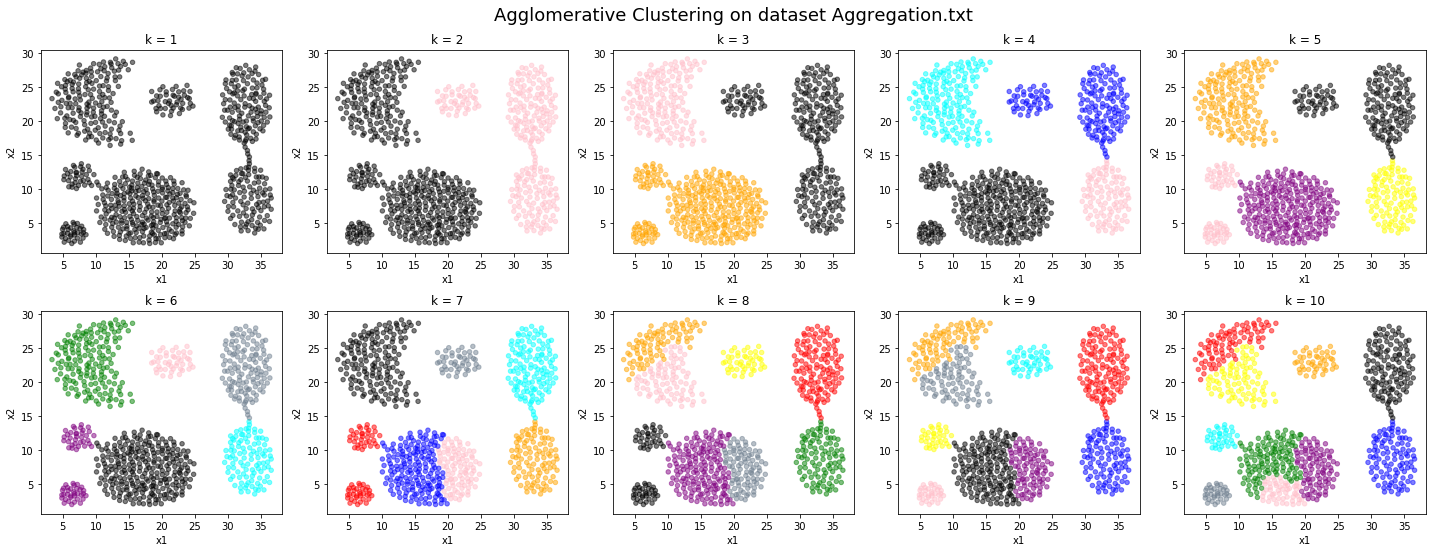

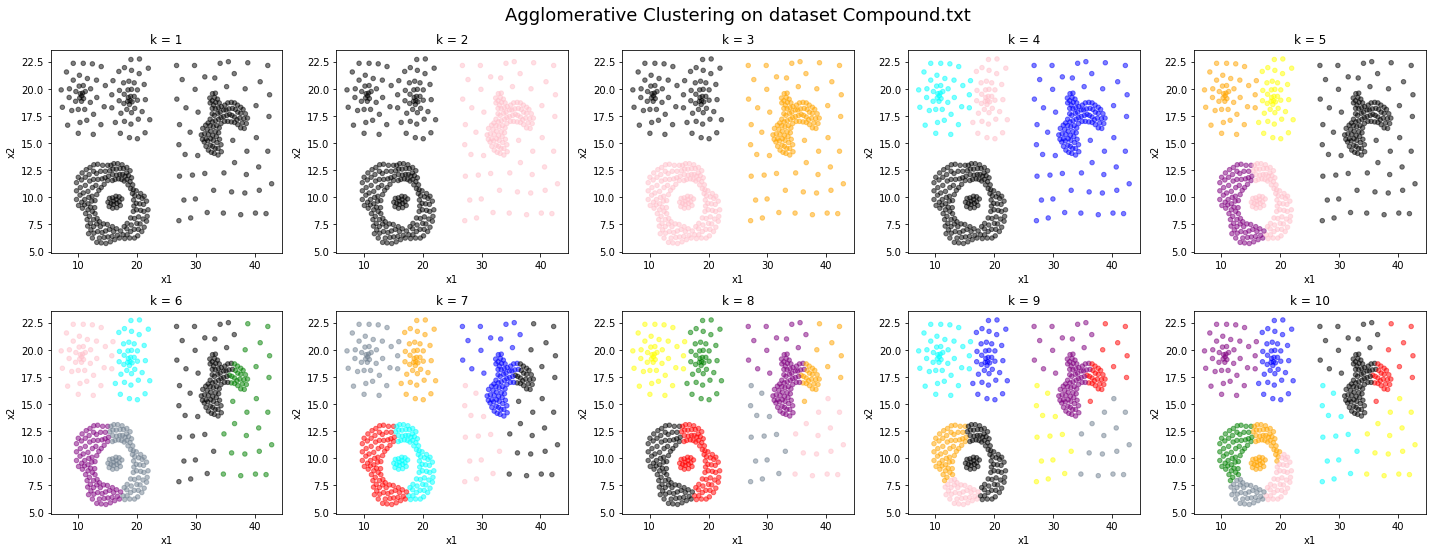

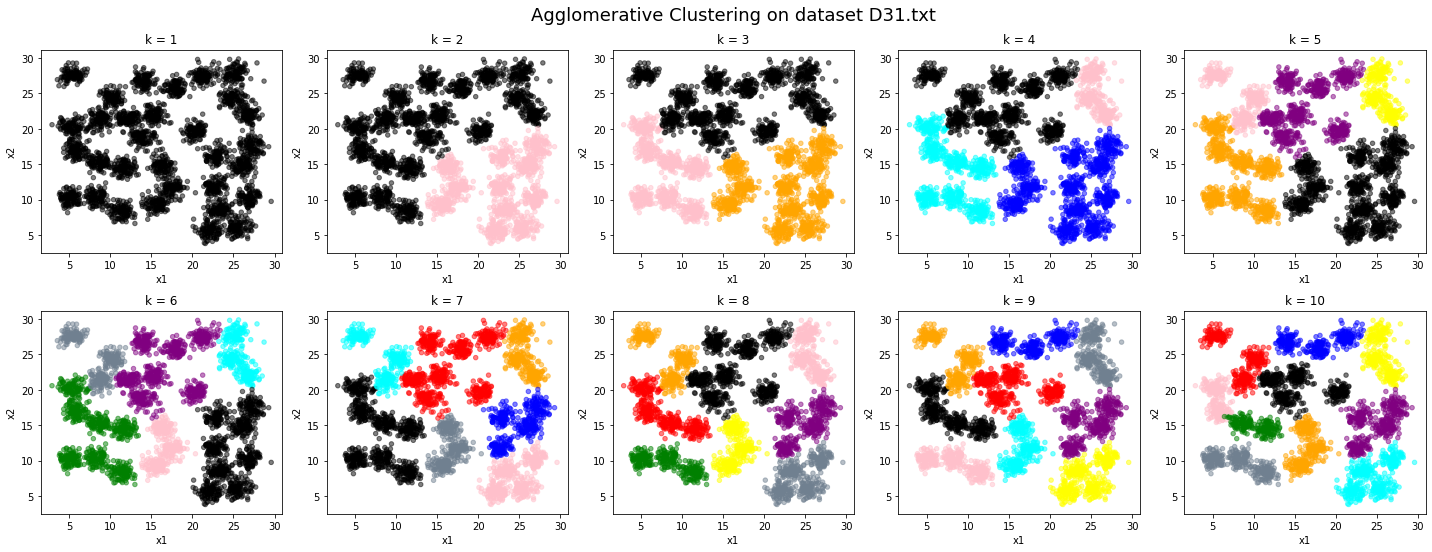

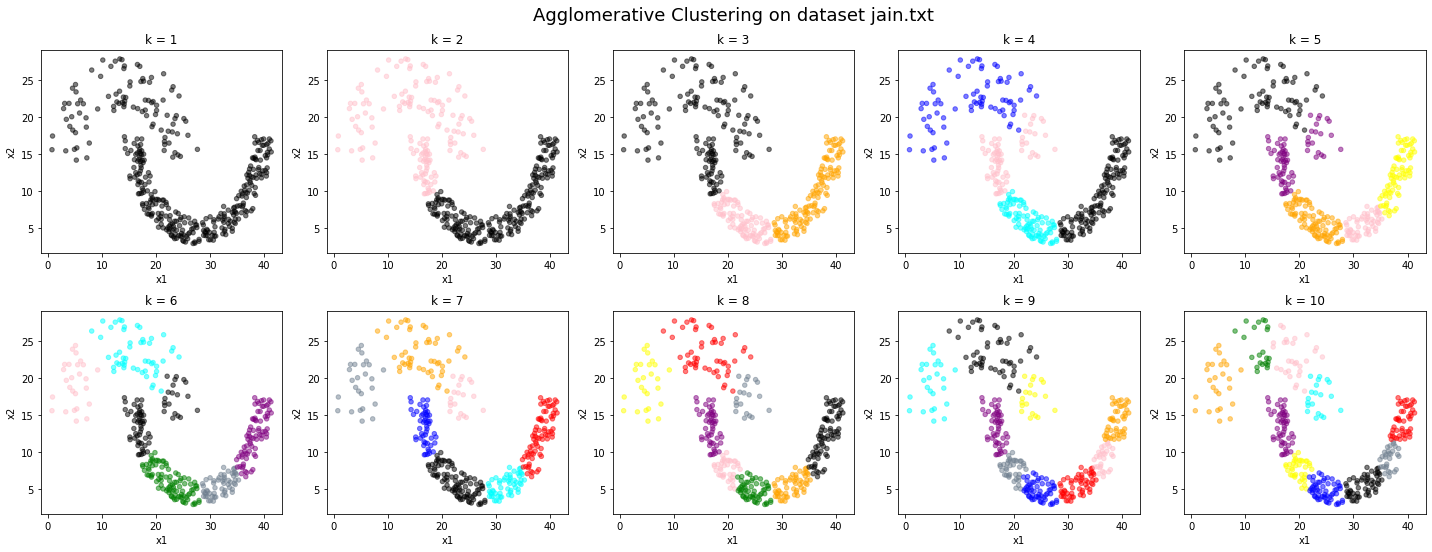

In [13]:
# AgglomerativeClustering
# tune n_clusters to decide the optimal model by visual inspection.

Q1d_agglom_label = []
# build the models and get the labels from each model.
for data in df_list:
    for k in Q1d_k_value:
        Q1d_agglom_label.append(AgglomerativeClustering(n_clusters=k).fit(data).labels_)

Q1d_agglom_label = np.array(Q1d_agglom_label).reshape(len(df_list),len(Q1d_k_value))

# plot the data points and the labels for each model
# List of named colors: https://matplotlib.org/gallery/color/named_colors.html
color_list = ['black','red', 'purple', 'blue', 'green', 'orange', 'aqua', 'yellow', 'slategray', 'pink']
cmap_list_Q1 = ListedColormap(color_list)

for row in range(len(df_list)):
    # create a plot for each row
    fig = plt.figure(figsize= [20, 8])
    plt.title(f'Agglomerative Clustering on dataset {df_names[row]}', y = 1.05, fontsize = 18)
    plt.axis('off')
    # adjust the distance between figures
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for col in range(len(Q1d_k_value)):
        # seperate the figure into 2x5 smaller space to plot and plot in the jth subplot
        fig.add_subplot(2, len(Q1d_k_value)/2, col + 1) 
        # plot the data points
        plt.scatter(df_list[row][:, 0], df_list[row][:, 1], c = Q1d_agglom_label[row, col], cmap= cmap_list_Q1, s = 20, alpha = 0.5)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title(f'k = {col+1}')
        plt.tight_layout()
        
# choose the best k value for each dataset and record the k values for latter use
Q1d_agglom_parameters = np.array([6,5,6,2])

In [14]:
# Gaussian Mixture
# tune argument n_components (number of clusters/ distributions) (& covariance_type)
# to decide the optimal model by BIC
# example: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

# create an array to record the BIC of the models for each combination of dataset and k
Q1d_gmm_bic = np.empty([len(df_list), len(Q1d_k_value)])

# calculate the BIC for each model
for row, data in enumerate(df_list):
    for k in Q1d_k_value:
        gmm = GaussianMixture(n_components=k).fit(data)
        Q1d_gmm_bic[row, k-1] = gmm.bic(data)

# choose the best k value for each dataset and record the k values for latter use
Q1d_gmm_parameters = np.argmin(Q1d_gmm_bic, axis = 1) + 1

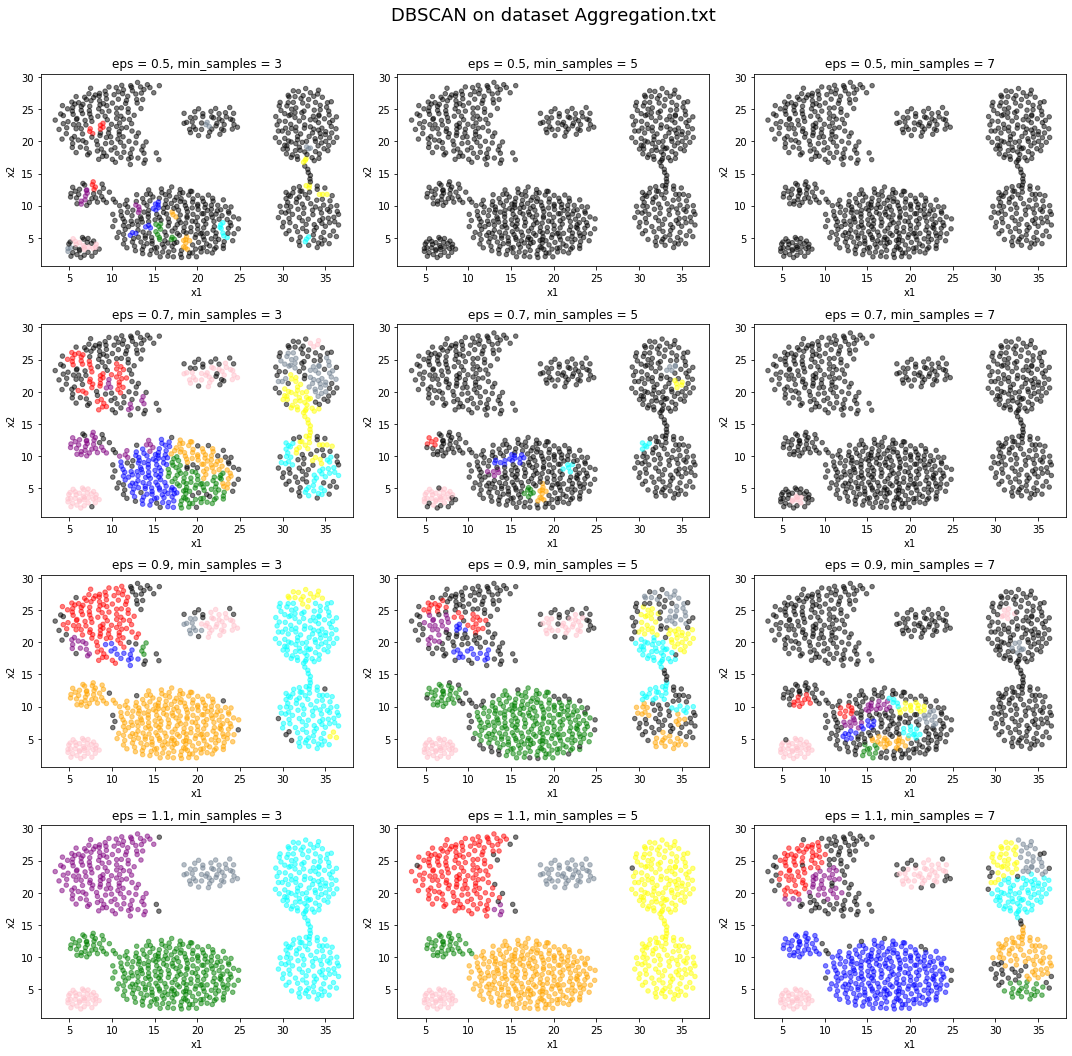

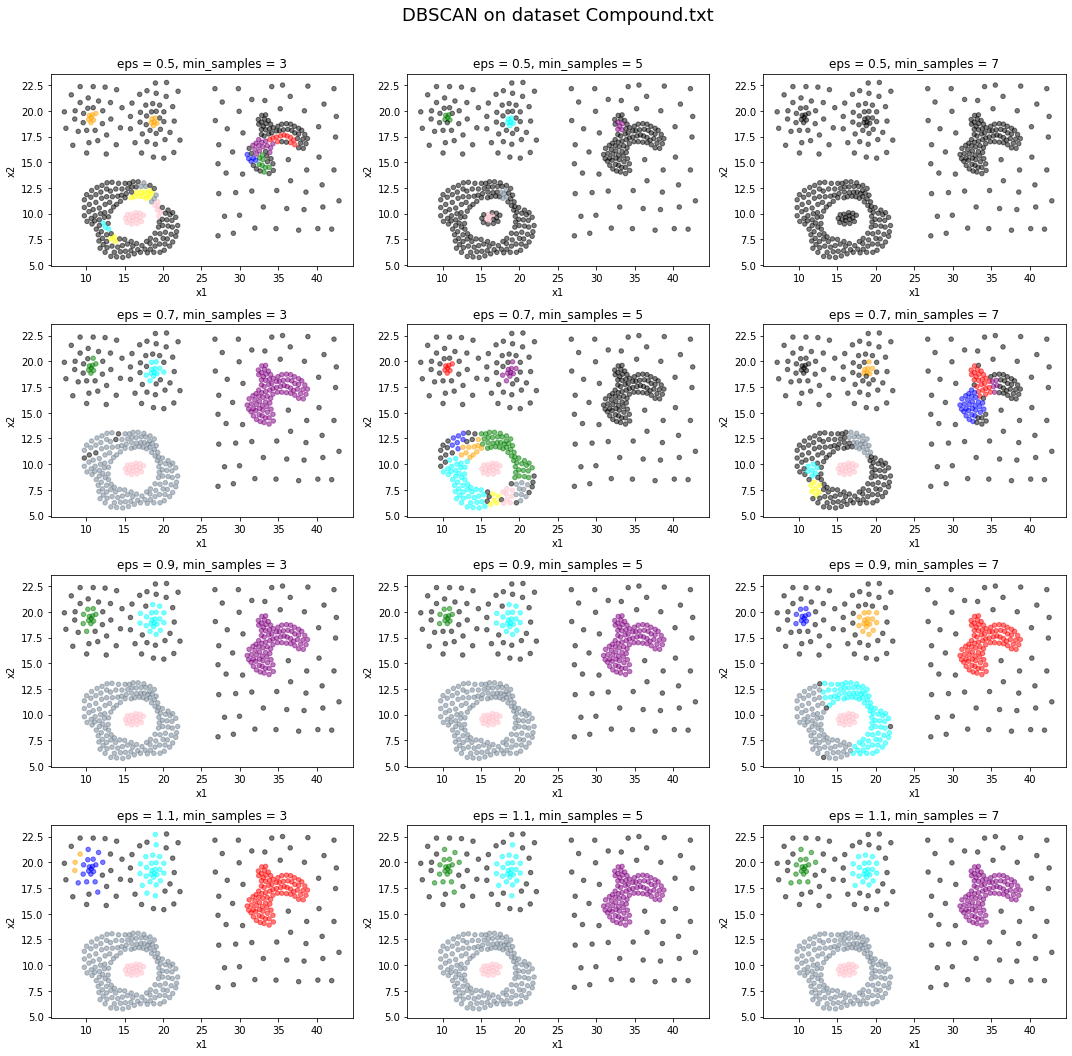

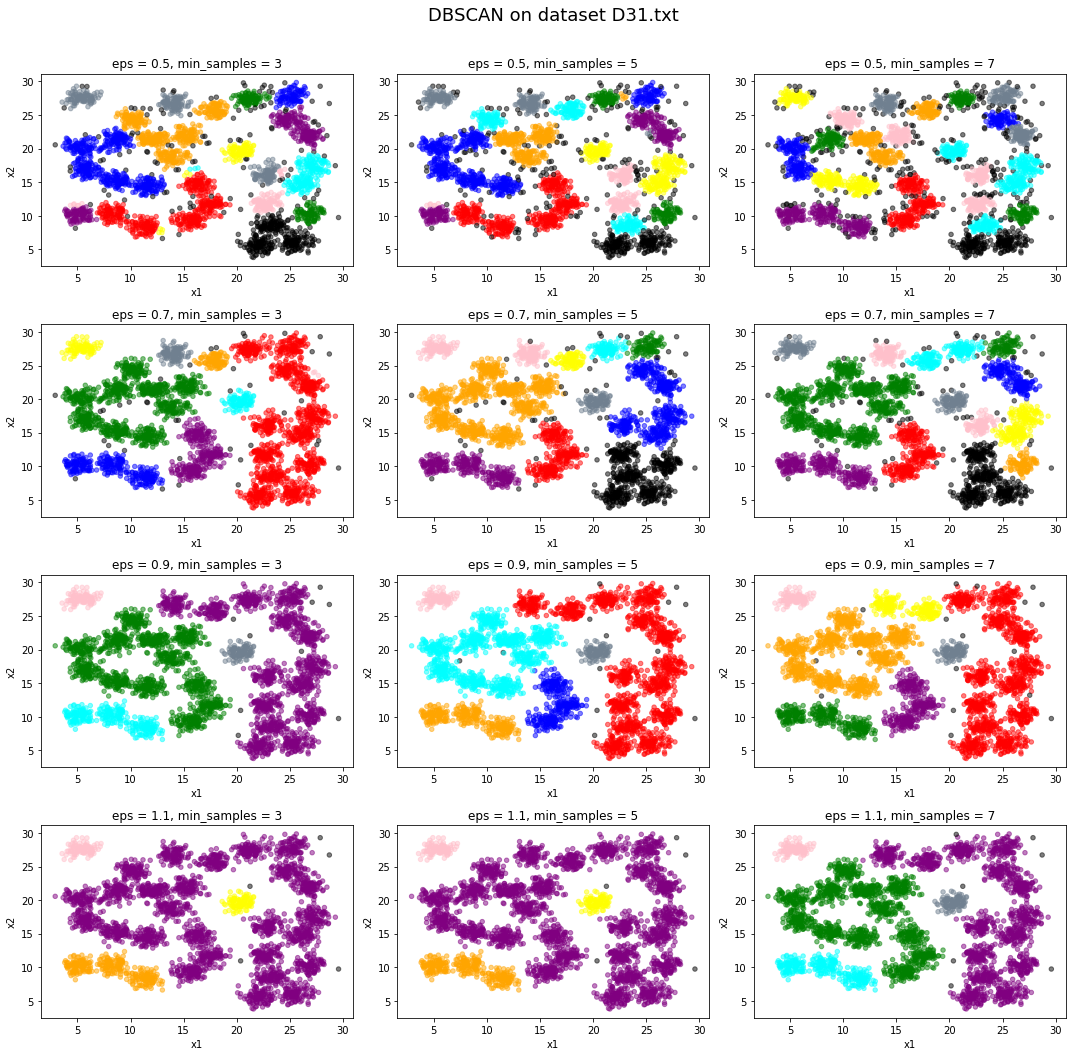

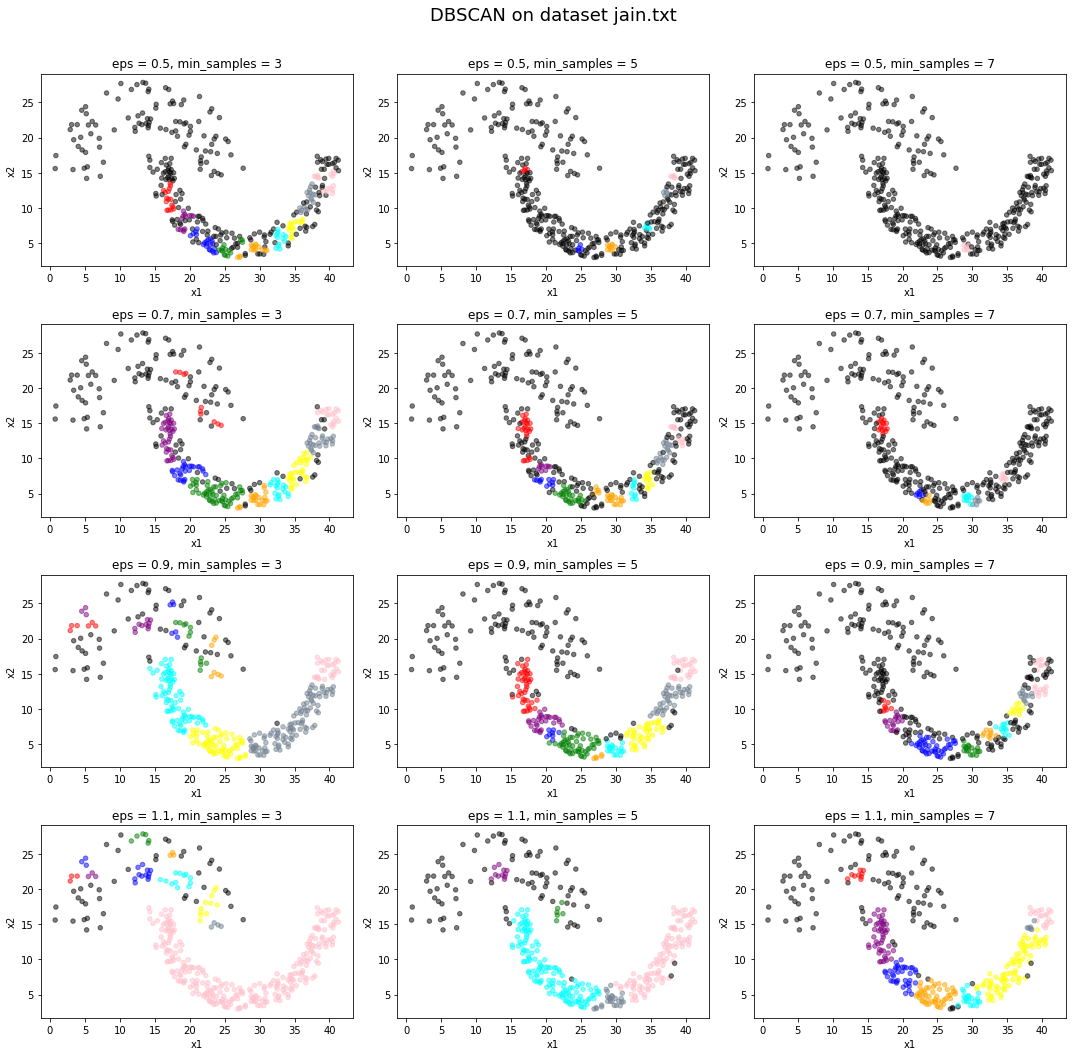

In [15]:
# DBSCAN
# tune eps and min_samples to decide the optimal model by visual inspection.
# set the parameters
eps_list = np.arange(5,13,2) / 10
min_samples_list = np.arange(3,9,2)

Q1d_DBSCAN_label = []
# build the models and get the labels from each model.
for data in df_list:
    for eps in eps_list:
        for min_samples in min_samples_list:
            Q1d_DBSCAN_label.append(DBSCAN(eps=eps, min_samples=min_samples).fit(data).labels_)
            
Q1d_DBSCAN_label = np.array(Q1d_DBSCAN_label).reshape(len(df_list),len(eps_list), len(min_samples_list))

# plot the data points and the labels for each model
for row in range(len(df_list)):
    # create a plot for each row
    fig = plt.figure(figsize= [15, 15])
    plt.title(f'DBSCAN on dataset {df_names[row]}', y = 1.05, fontsize = 18)
    plt.axis('off')
    # adjust the distance between figures
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for eps_idx in range(len(eps_list)):
        for min_sam_idx in range(len(min_samples_list)):
            # seperate the figure into 3x4 smaller space to plot and plot in the jth subplot
            fig.add_subplot(len(eps_list), len(min_samples_list), len(min_samples_list)*eps_idx + min_sam_idx +1) 
            # plot the data points
            plt.scatter(df_list[row][:, 0], df_list[row][:, 1], c = Q1d_DBSCAN_label[row, eps_idx, min_sam_idx], cmap= cmap_list_Q1, s = 20, alpha = 0.5)
            plt.xlabel('x1')
            plt.ylabel('x2')
            plt.title(f'eps = {eps_list[eps_idx]}, min_samples = {min_samples_list[min_sam_idx]}')
            plt.tight_layout()
        
# choose the best eps x min_samples value for each dataset and record the values for latter use
Q1d_DBSCAN_parameters = np.array([[1.1,5],[1.1,5],[0.9,7],[1.1,3]])

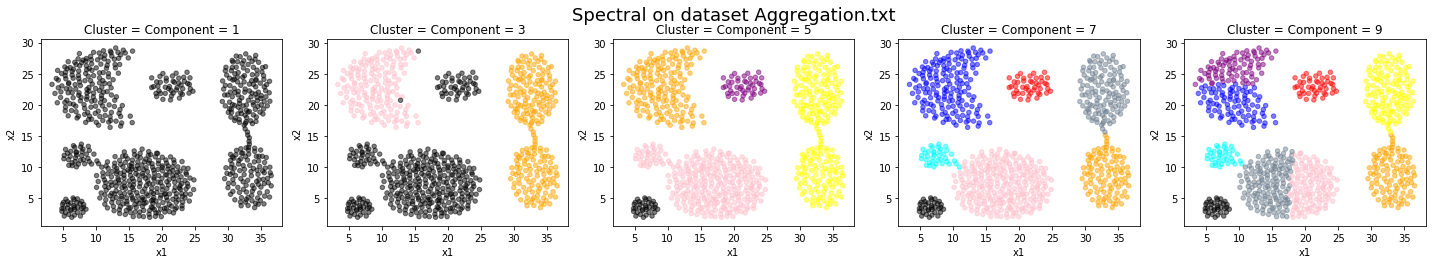

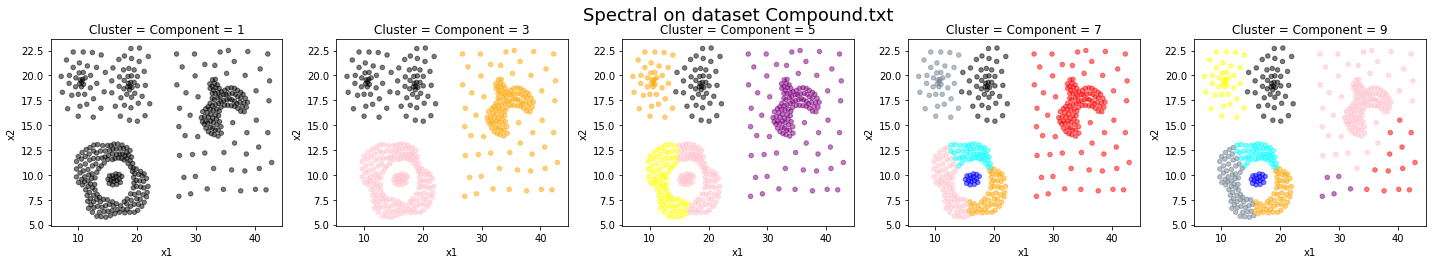

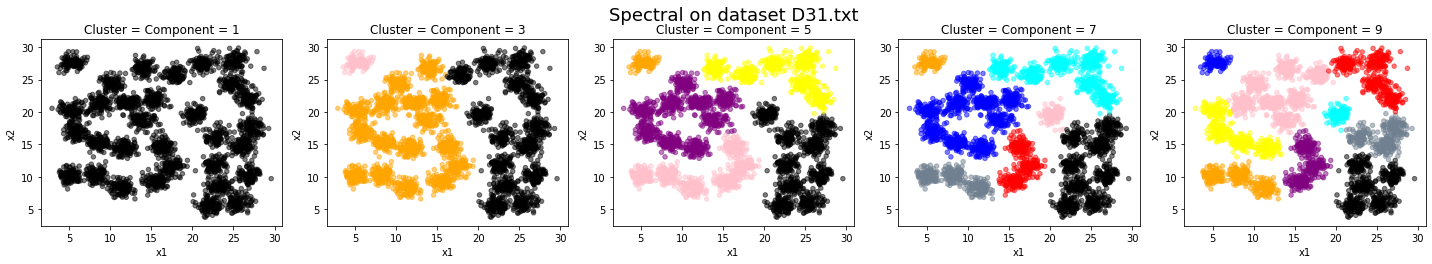

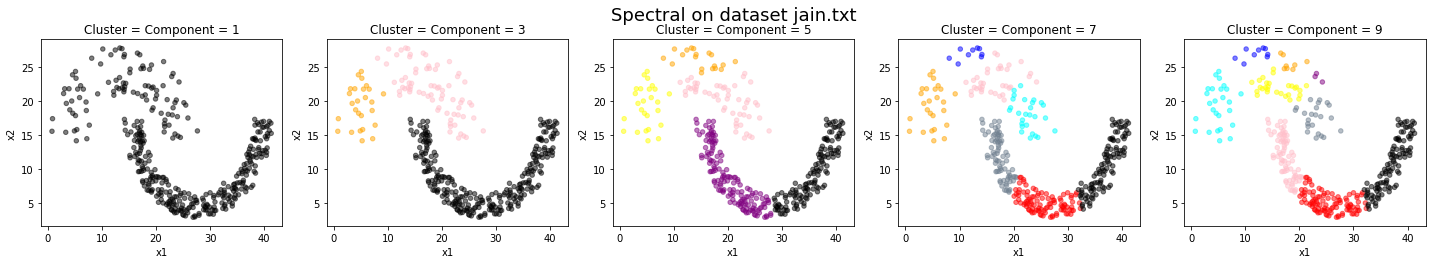

In [16]:
# Spectral: https://www.geeksforgeeks.org/ml-spectral-clustering/
# tune n_clusters and (n_components) to decide the optimal model by visual inspection.
# set parameters
clusters_list = np.arange(1,11,2)

Q1d_spectral_label = []
# build the models and get the labels from each model.
for data in df_list:
    for cluster in clusters_list:
        Q1d_spectral_label.append(SpectralClustering(n_clusters = cluster, random_state = 0, assign_labels = 'discretize').fit(data).labels_)
            
Q1d_spectral_label = np.array(Q1d_spectral_label).reshape(len(df_list),len(clusters_list))
            
# plot the data points and the labels for each model
for row in range(len(df_list)):
    # create a plot for each row
    fig = plt.figure(figsize= [20, 4])
    plt.title(f'Spectral on dataset {df_names[row]}', y = 1.07, fontsize = 18)
    plt.axis('off')
    # adjust the distance between figures
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for clu_idx in range(len(clusters_list)):
        # seperate the figure into 3x4 smaller space to plot and plot in the jth subplot
        fig.add_subplot(1, len(clusters_list), clu_idx +1) 
        # plot the data points
        plt.scatter(df_list[row][:, 0], df_list[row][:, 1], c = Q1d_spectral_label[row, clu_idx], cmap= cmap_list_Q1, s = 20, alpha = 0.5)            
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title(f'Cluster = Component = {clusters_list[clu_idx]}')
        plt.tight_layout()        


# choose the best n_cluster value for each dataset and record the values for latter use
Q1d_spectral_parameters = np.array([7,5,7,3])

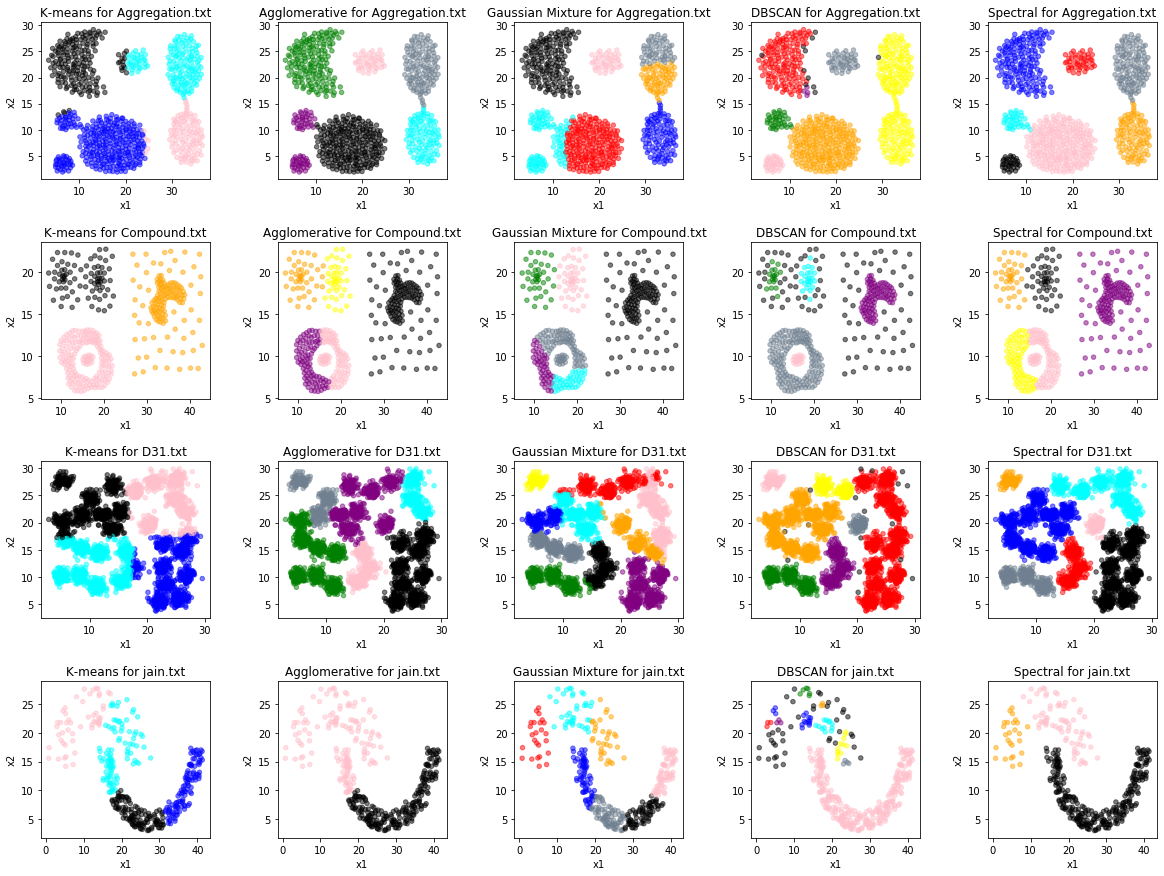

In [17]:
# draw the 4-by-5 subplot showing the resulting clustering of each method

# draw the 4-by-5 subplot
# create a plot
fig = plt.figure(figsize= [20, 15])
    
for df_idx, data in enumerate(df_list):
    # adjust the distance between figures
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    # draw the plots
    # k-means
    fig.add_subplot(len(df_list), 5, df_idx*5 + 1) 
    kmeans_label = KMeans(n_clusters= Q1d_kmeans_parameters[df_idx], random_state=0).fit(data).labels_
    plt.scatter(df_list[df_idx][:, 0], df_list[df_idx][:, 1], c = kmeans_label, cmap= cmap_list_Q1, s = 20, alpha = 0.5)            
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'K-means for {df_names[df_idx]}')

    # Agglomerative
    fig.add_subplot(len(df_list), 5, df_idx*5 + 2) 
    agglom_label = AgglomerativeClustering(n_clusters= Q1d_agglom_parameters[df_idx]).fit(data).labels_
    plt.scatter(df_list[df_idx][:, 0], df_list[df_idx][:, 1], c = agglom_label, cmap= cmap_list_Q1, s = 20, alpha = 0.5)            
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Agglomerative for {df_names[df_idx]}')

    # Gaussian Mixture
    fig.add_subplot(len(df_list), 5, df_idx*5 + 3) 
    gmm_label = GaussianMixture(n_components=Q1d_gmm_parameters[df_idx]).fit_predict(data)
    plt.scatter(df_list[df_idx][:, 0], df_list[df_idx][:, 1], c = gmm_label, cmap= cmap_list_Q1, s = 20, alpha = 0.5)            
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Gaussian Mixture for {df_names[df_idx]}')

    # DBSCAN
    fig.add_subplot(len(df_list), 5, df_idx*5 + 4) 
    DBSCAN_label = DBSCAN(eps=Q1d_DBSCAN_parameters[df_idx][0], min_samples=Q1d_DBSCAN_parameters[df_idx][1]).fit(data).labels_
    plt.scatter(df_list[df_idx][:, 0], df_list[df_idx][:, 1], c = DBSCAN_label, cmap= cmap_list_Q1, s = 20, alpha = 0.5)            
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'DBSCAN for {df_names[df_idx]}')

    # Spectral
    fig.add_subplot(len(df_list), 5, df_idx*5 + 5) 
    spectral_label = SpectralClustering(n_clusters = Q1d_spectral_parameters[df_idx], random_state = 0, assign_labels = 'discretize').fit(data).labels_
    plt.scatter(df_list[df_idx][:, 0], df_list[df_idx][:, 1], c = spectral_label, cmap= cmap_list_Q1, s = 20, alpha = 0.5)            
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Spectral for {df_names[df_idx]}')


Spectral clustering method works the best on each dataset.
- Aggregation.txt: It is the only method that gives each cluster only one color.
- Compound.txt: Though is failed to classify the yellow and pink points as in the same cluster, the orange, black, and purple clusters are well classified compare to other methods.
- D31.txt: It separate the data points into proper number of different clusters. Moreover, every point in the same cluster is close to other points in the same cluster.
- jain.txt: It successfully separate the data points into 3 clusters as human eye can recognize while other methods would wrongly separate the data points into much more number clusters or only two clusters.

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

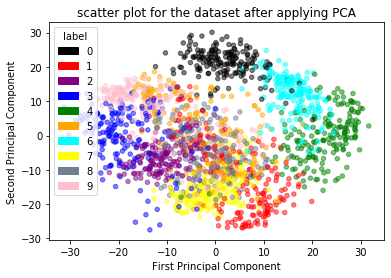

In [18]:
# load the digits dataset
from sklearn.datasets import load_digits
digits, class_ = load_digits(return_X_y = True)

# apply PCA
# since all features are in a same scale, there is no need to standardize the data. 
# sklearn's PCA does not standardize for us. So, if your dataset does have different scales across features, 
# you need to scale them before apply PCA. 
from sklearn.decomposition import PCA
digits_pca = PCA(n_components=2).fit_transform(digits)

# plot the data with labels in two dimensional space
# List of named colors: https://matplotlib.org/gallery/color/named_colors.html
color_list = ['black','red', 'purple', 'blue', 'green', 'orange', 'aqua', 'yellow', 'slategray', 'pink']
cmap_list_Q2 = ListedColormap(color_list)

# plot the data points
plt.scatter(digits_pca[:, 0], digits_pca[:, 1], c = class_, cmap= cmap_list_Q2, s = 20, alpha = 0.5)
plt.title('scatter plot for the dataset after applying PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# add legend to the plot
legend_patch = []
for c, color in enumerate(color_list):
    legend_patch.append(patches.Patch(color=color, label=f'{c}'))
plt.legend(title='label',handles=legend_patch)

plt.show()

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

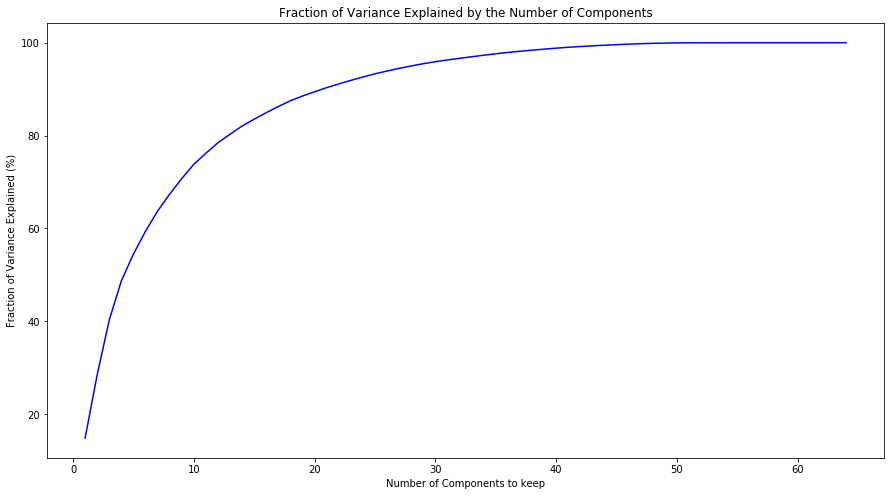

71.490635% of the variance of the data is unexplained by the first two principal components of the data.

The first two principal components failed to explain more than 50% of the variance of the data after conducting PCA. This means that probably the data is not well-clustered.


In [19]:
# calculate the explained variance for 1~D principal components
digits_pca_explained = []
for i in range(64):
    digits_pca_explained.append(PCA(n_components= i + 1).fit(digits).explained_variance_ratio_.sum())

# the plot of cumulative fraction of variance explained
plt.figure(figsize=(15,8))
plt.plot(np.arange(1,65, dtype = int), np.multiply(digits_pca_explained, 100), color = 'blue')
plt.xlabel('Number of Components to keep')
plt.ylabel('Fraction of Variance Explained (%)')
plt.title('Fraction of Variance Explained by the Number of Components')
plt.show()

print(f'{ (1 - digits_pca_explained[1]) * 100 :2f}% of the variance of the data is unexplained by the first two principal components of the data.\n')
print('The first two principal components failed to explain more than 50% of the variance of the data after conducting PCA. This means that probably the data is not well-clustered.')

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

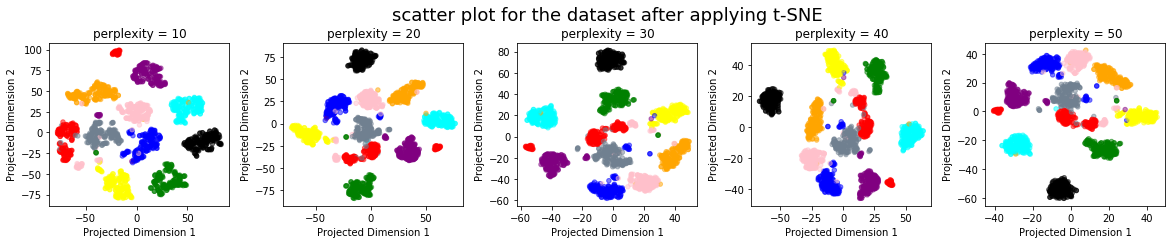

In [20]:
# reduce the dimensionality of the data with t-SNE
from sklearn.manifold import TSNE
perplexity_list = np.arange(10,60,10)

Q2c_tSNE_x_new = []
# build the models and get the labels from each model.
for per in perplexity_list:
    Q2c_tSNE_x_new.append(TSNE(n_components=2, perplexity = per).fit_transform(digits))
                    
# plot the data points and the labels for each model
fig = plt.figure(figsize= [20, 3])
plt.title('scatter plot for the dataset after applying t-SNE', y = 1.10, fontsize = 18)
plt.axis('off')
# adjust the distance between figures
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for per_idx in range(len(perplexity_list)):
    # seperate the figure into 3x4 smaller space to plot and plot in the jth subplot
    fig.add_subplot(1, len(perplexity_list), per_idx +1) 
    # plot the data points
    plt.scatter(Q2c_tSNE_x_new[per_idx][:, 0], Q2c_tSNE_x_new[per_idx][:, 1], c = class_, cmap= cmap_list_Q2, s = 20, alpha = 0.5)
    plt.xlabel('Projected Dimension 1')
    plt.ylabel('Projected Dimension 2')
    plt.title(f'perplexity = {perplexity_list[per_idx]}')

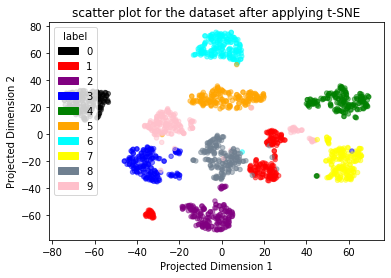

In [21]:
# fit the model with best perplexity value
digits_embedded = TSNE(n_components=2, perplexity = 20).fit_transform(digits)

# plot the data with labels in two dimensional space
# plot the data points
plt.scatter(digits_embedded[:, 0], digits_embedded[:, 1], c = class_, cmap= cmap_list_Q2, s = 20, alpha = 0.5)
plt.title('scatter plot for the dataset after applying t-SNE')
plt.xlabel('Projected Dimension 1')
plt.ylabel('Projected Dimension 2')

# add legend to the plot
plt.legend(title='label', handles=legend_patch)

plt.show()

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*   
-> The t-SNE seems to cluster the data best because almost all the points in the same cluster near to each other and we can see obvious white space between different clusters.

## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

In [22]:
# Neural network models (supervised): https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
# MLPClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

class myNeuralNetwork(object):
    
    def __init__(self, n_in, n_layer1, n_layer2, n_out, learning_rate):
        '''__init__
        Class constructor: Initialize the parameters of the network including
        the learning rate, layer sizes, and each of the parameters
        of the model (weights, placeholders for activations, inputs, 
        deltas for gradients, and weight gradients). This method
        should also initialize the weights of your model randomly
            Input:
                n_in:          number of inputs
                n_layer1:      number of nodes in layer 1
                n_layer2:      number of nodes in layer 2
                n_out:         number of output nodes
                learning_rate: learning rate for gradient descent
            Output:
                none
        '''
        self.n_in = n_in
        self.n_layer1 = n_layer1
        self.n_layer2 = n_layer2
        self.n_out = n_out
        self.learning_rate = learning_rate
        
        self.para = []
        # record x~a3
        self.acti = []
        self.z = []
        self.X = None
        self.y = None
        self.y_hat = []
        self.delta = None
        self.gradient_weight = None
        
        # not necessary
        self.hidden_layer_sizes = 2
    
    def forward_propagation(self, x):
        '''forward_propagation
        Takes a vector of your input data (one sample) and feeds
        it forward through the neural network, calculating activations and
        layer node values along the way.
            Input:
                x: a vector of data represening 1 sample [n_in x 1]
            Output:
                y_hat: a vector (or scaler of predictions) [n_out x 1]
                (typically n_out will be 1 for binary classification)
                a_by_layer: a list of activations by layer
        '''
        
        z = x
        # the list to store activations by layer
        a_by_layer = [z]
        self.z = [z]
        for w in self.para:
            # calculate activations
            a = np.dot(w,z)
            # record activations of the layer
            a_by_layer.append(a)
            # update z
            z = self.sigmoid(a)
            # record activations of z
            self.z.append(z)
        
        y_hat = a_by_layer[-1]
        
        return self.sigmoid(y_hat), a_by_layer
    def compute_loss(self, X, y):
        '''compute_loss
        Computes the current loss/cost function of the neural network
        based on the weights and the data input into this function.
        To do so, it runs the X data through the network to generate
        predictions, then compares it to the target variable y using
        the cost/loss function
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                loss: a scalar measure of loss/cost
        '''
        # calculate the y_hat for the input data X
        loss = 0
        if len(X) == 1:
            y_, _ = self.forward_propagation(X.reshape(-1,1))
            loss = 0.5 * np.square(y_-y)
        else:
            for idx, x in enumerate(X):
                y_, _ = self.forward_propagation(x.reshape(-1,1))
                loss += 0.5 * np.square(y_- y[idx] )
        return loss.sum()
        
    
    def backpropagate(self, x, y):
        '''backpropagate
        Backpropagate the error from one sample determining the gradients
        with respect to each of the weights in the network. The steps for
        this algorithm are:
            1. Run a forward pass of the model to get the activations 
               Corresponding to x and get the loss functionof the model 
               predictions compared to the target variable y
            2. Compute the deltas (see lecture notes) and values of the
               gradient with respect to each weight in each layer moving
               backwards through the network
    
            Input:
                x: A vector of 1 samples of data [n_in x 1]
                y: Target variable [scalar]
            Output:
                loss: a scalar measure of th loss/cost associated with x,y
                      and the current model weights
        '''
        
        # run a forward pass of the model on x
        y_hat, a_by_layer = self.forward_propagation(x)
        # get the loss function of the model predictions compared to the target variable y
        loss = self.compute_loss(x.reshape(1,2), y)
        # calculate the delta and record it
        self.delta = []
        # delta 3~1
        self.delta.append( self.sigmoid_derivative(a_by_layer[3]) * (y_hat-y)) 
        #self.delta.append( self.delta[0] * np.multiply(self.para[3-1], self.sigmoid_derivative(a_by_layer[2])) )
        
        #temp = self.para[2-1]
        #for idx, row in enumerate(temp):
         #   temp[idx] = self.delta[1][:, idx] * row
        #temp = temp.sum(axis = 1)
        #self.delta.append( np.multiply(self.sigmoid_derivative(a_by_layer[1]), temp)  )
        
        self.delta.append((self.delta[0] @ self.para[3-1]) * self.sigmoid_derivative(a_by_layer[2]))

        self.delta.append((self.delta[1] @ self.para[2-1]) * self.sigmoid_derivative(a_by_layer[1]))
        
        # reverse the order
        self.delta.reverse()
        
        # calculate the gradient for each weight
        self.gradient_weight = []
        for idx in range(len(self.delta)):
            self.gradient_weight.append(np.dot(self.delta[idx].reshape(-1,1), np.transpose(self.z[idx].reshape(-1,1))))
        
        return loss
        
        
    def stochastic_gradient_descent_step(self):
        '''stochastic_gradient_descent_step
        Using the gradient values computer by backpropagate, update each
        weight value of the model according to the familiar stochastic
        gradient descent update equation.
        
        Input: none
        Output: none
        '''
        for idx, p in enumerate(self.para):
            self.para[idx] = p - np.multiply(self.learning_rate, self.gradient_weight[idx])
            
        
    
    def fit(self, X, y, X_val= None, y_val= None, max_epochs= 500, get_validation_loss=False):
        '''fit
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                training_loss:   Vector of training loss values at the end of each epoch
                validation_loss: Vector of validation loss values at the end of each epoch
                                 [optional output if get_validation_loss==True]
        '''
        
        self.X = X
        self.y = y
        
        # initialize parameters
        np.random.seed(123)
        # number of inputs, nodes in hidden layers, and number of output nodes
        nodes = [self.n_in, self.n_layer1, self.n_layer2, self.n_out]
        for idx in range(len(nodes) - 1):
            self.para.append(np.random.randint(-5,5, size = (nodes[idx+1], nodes[idx])))
        
        # do stochastic gradient descent to find the best parameters
        cost_pre = 0
        cost_current = 0
        training_loss = [self.compute_loss(X,y)]
        if get_validation_loss:
            validation_loss = [self.compute_loss(X_val, y_val)]
        
        n_iter_no_change = 0
        for ite in range(max_epochs):
            # update cost variables
            cost_pre = cost_current
            cost_current = 0
            
            # set random seed and shuffle the order of idx, which is used to determine the order of using input data
            np.random.seed(200+ite)
            idx = np.arange(len(self.X), dtype = int)
            np.random.shuffle(idx)
            
            # select each row to do gradient descent
            for i in idx:
                c = self.backpropagate(self.X[i], self.y[i])
                self.stochastic_gradient_descent_step()
            cost_current = self.compute_loss(self.X, self.y)
            training_loss.append(cost_current)
                
            if get_validation_loss:
                validation_loss.append(self.compute_loss(X_val, y_val))
             
            # check if the loss converged
            if abs(cost_current - cost_pre) < 0.0001:
                n_iter_no_change +=1
                if n_iter_no_change == 10:
                    break
        
        
        # calculate the y_hat and activations row by row based on the best weight
        for obs in self.X:
            y_hat, a_by_layer = self.forward_propagation(obs.reshape(-1,1))
            self.y_hat.append(np.where(y_hat < 0.5, 0, 1))
            self.acti.append(a_by_layer)
        
        if get_validation_loss == False:
            return training_loss
        else:
            return training_loss, validation_loss
        
        
    def predict_proba(self, X):
        '''predict_proba
        Compute the output of the neural network for each sample in X, with the last layer's
        sigmoid activation providing an estimate of the target output between 0 and 1
            Input:
                X: A matrix of N samples of data [N x n_in]
            Output:
                y_hat: A vector of class predictions between 0 and 1 [N x 1]
        '''
        y_hat = np.array([0])
        for idx, x in enumerate(X):
            y, _ = self.forward_propagation(x)
            y_hat = np.concatenate((y_hat, y))
        y_hat = np.delete(y_hat, 0)
        return y_hat
    
    def predict(self, X, decision_thresh=0.5):
        '''predict
        Compute the output of the neural network prediction for 
        each sample in X, with the last layer's sigmoid activation 
        providing an estimate of the target output between 0 and 1, 
        then thresholding that prediction based on decision_thresh
        to produce a binary class prediction
            Input:
                X: A matrix of N samples of data [N x n_in]
                decision_threshold: threshold for the class confidence score
                                    of predict_proba for binarizing the output
            Output:
                y_hat: A vector of class predictions of either 0 or 1 [N x 1]
        '''
        y_hat = self.predict_proba(X)
        y_hat = np.where(y_hat < decision_thresh, 0, 1)
        return y_hat
    
    def sigmoid(self, X):
        '''sigmoid
        Compute the sigmoid function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid function
        '''
        X_sigmoid = 1/(1+ np.exp(-X))
        return X_sigmoid
    
    def sigmoid_derivative(self, X):
        '''sigmoid_derivative
        Compute the sigmoid derivative function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid derivative function
        '''
        X_sigmoid = self.sigmoid(X)*(1-self.sigmoid(X))
        return X_sigmoid


**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

In [23]:
from sklearn.datasets import make_moons
train = make_moons(n_samples=500, noise=0.2)
test = make_moons(n_samples=100, noise=0.2)
learning_rate_list = [0.1, 0.01, 0.001, 0.0001]

In [24]:
myNN =  []
myNN_loss_training = []
myNN_loss_test = []
for idx, rate in enumerate(learning_rate_list):
    # fit the model
    myNN.append(myNeuralNetwork(2,5,5,1,rate))
    # record the vector of loss for training data and test data for each epoch
    loss_train, loss_vali = myNN[idx].fit(train[0], train[1], test[0],test[1], get_validation_loss = True)
    myNN_loss_training.append(loss_train)
    myNN_loss_test.append(loss_vali)

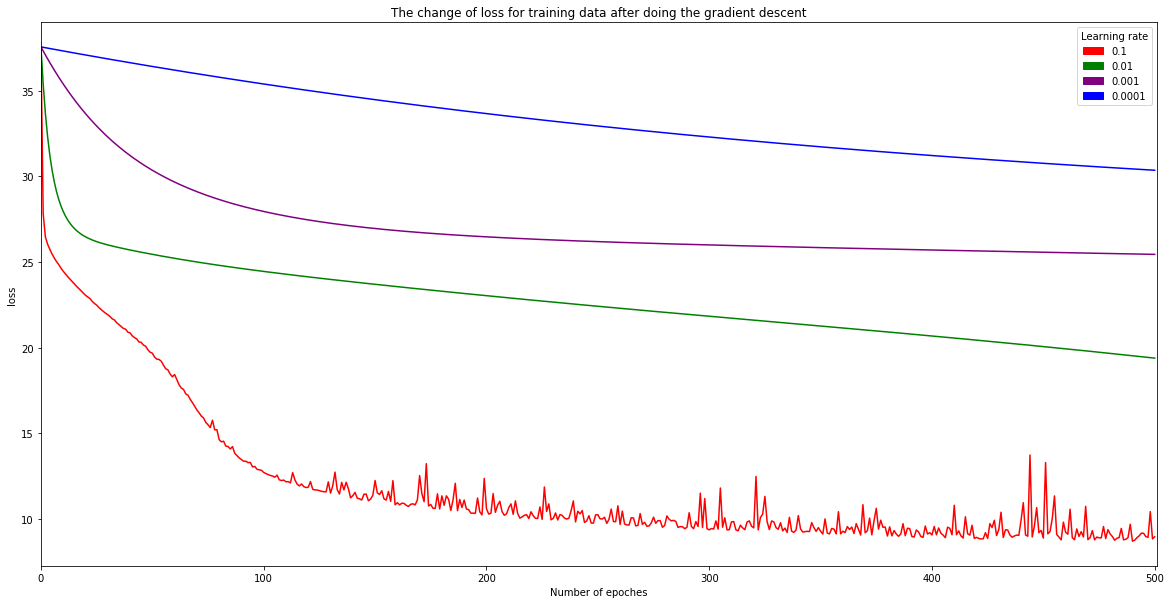

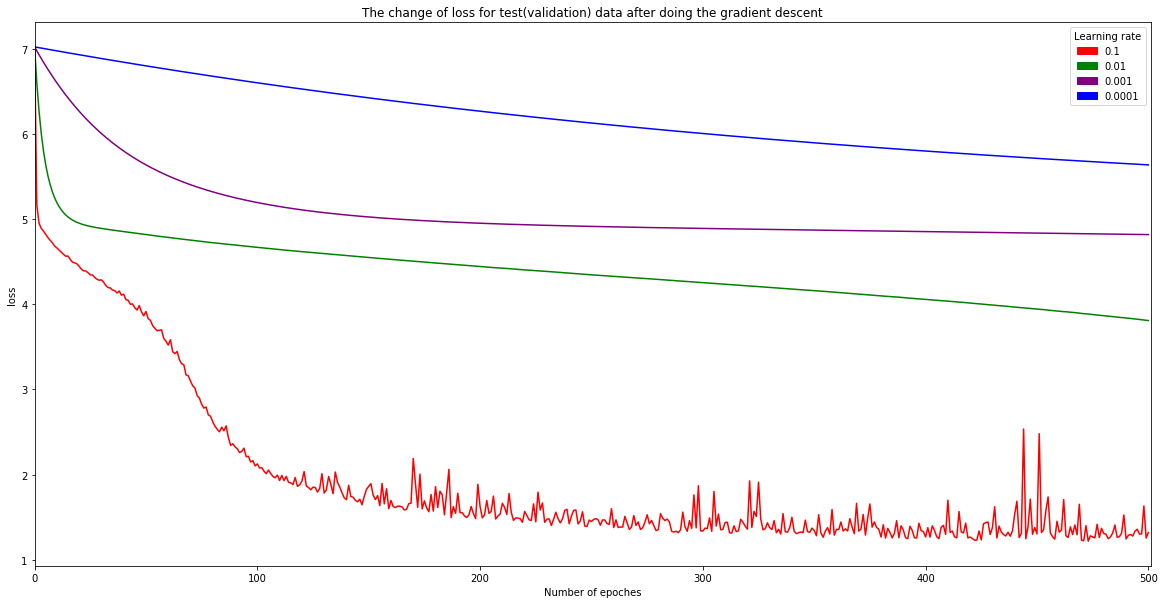

In [25]:
color_list = ['red', 'green', 'purple', 'blue']
patch_list = []

# plot the leaning curve for training data
plt.figure(figsize=(20,10))
plt.xlim([0, 501])
plt.xlabel('Number of epoches')
plt.ylabel('loss')
for i, rate in enumerate(learning_rate_list):
    plt.plot(np.arange(0, len(myNN_loss_training[i])), myNN_loss_training[i], color = color_list[i])
    patch_list.append(patches.Patch(color =  color_list[i], label = f'{rate}'))
    
plt.legend(handles=patch_list, title = 'Learning rate')
plt.title('The change of loss for training data after doing the gradient descent')
plt.show()


# plot the leaning curve for test data
plt.figure(figsize=(20,10))
plt.xlim([0, 501])
plt.xlabel('Number of epoches')
plt.ylabel('loss')
for i, rate in enumerate(learning_rate_list):
    plt.plot(np.arange(0, len(myNN_loss_test[i])), myNN_loss_test[i], color = color_list[i])
    
plt.legend(handles=patch_list, title = 'Learning rate')
plt.title('The change of loss for test(validation) data after doing the gradient descent')
plt.show()

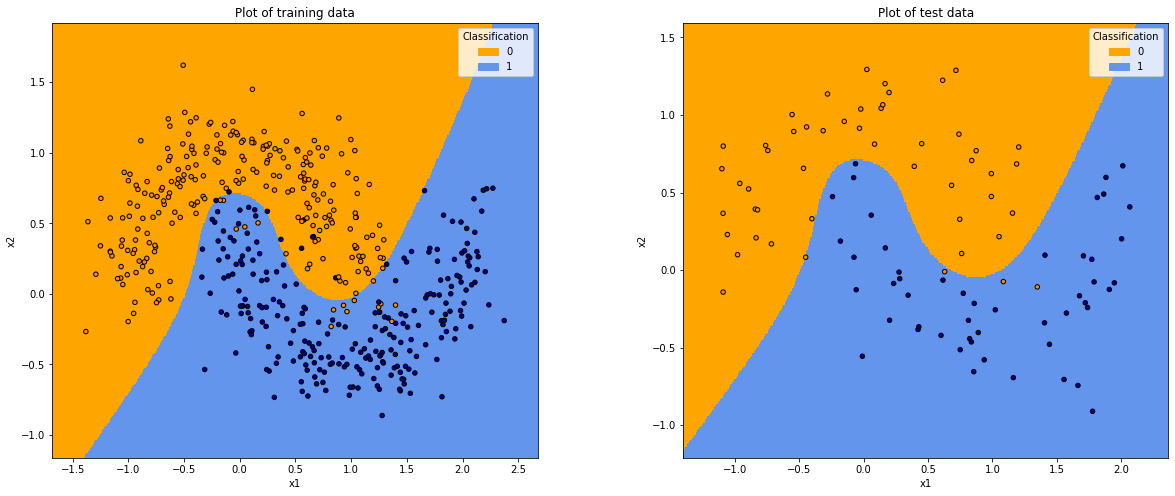

In [30]:
# plot the training and test data with the decision boundary based on my NN model
# set the colors
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])
# set the learning rate
l_rate_best = 0.1
#create a new figure    
fig = plt.figure(figsize = [20,8])
# adjust the distance between figures
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# train the model
clf_myNN = myNeuralNetwork(2,5,5,1,0.1)
clf_myNN.fit(train[0], train[1])


# plot for training data
fig.add_subplot(1, 2, 1)
# plot the decision boundary
mesh = np.meshgrid(np.arange(train[0][:,0].min() - 0.5, train[0][:,0].max() + 0.5, 0.01), np.arange(train[0][:,1].min() - 0.5, train[0][:,1].max() + 0.5, 0.01))
# calculate the predicted y value on the map
y_pred_train = clf_myNN.predict(np.c_[mesh[0].ravel(), mesh[1].ravel()])
# reshpe the predicted y value as matrix
y_pred_train = y_pred_train.reshape(mesh[0].shape)

# plot the background (decision boundary)
plt.pcolormesh(mesh[0], mesh[1], y_pred_train, cmap = cmap_light)

# plot the data points on the graph
plt.scatter(train[0][:,0], train[0][:,1], c= train[1], cmap=cmap_bold, edgecolor='k', s=20)
#add legend
orange_patch = patches.Patch(color='orange', label='0')
cornflowerblue_patch = patches.Patch(color='cornflowerblue', label='1')
plt.legend(handles=[orange_patch, cornflowerblue_patch], title = 'Classification')
# set the x & y axis
plt.xlim(train[0][:, 0].min() - 0.3, train[0][:, 0].max() + 0.3)
plt.ylim(train[0][:, 1].min() - 0.3, train[0][:, 1].max() + 0.3)
# set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f"Plot of training data")


# plot for test data
fig.add_subplot(1, 2, 2)
# plot the decision boundary
mesh = np.meshgrid(np.arange(test[0][:,0].min() - 0.5, test[0][:,0].max() + 0.5, 0.01), np.arange(test[0][:,1].min() - 0.5, test[0][:,1].max() + 0.5, 0.01))
# calculate the predicted y value on the map
y_pred_test = clf_myNN.predict(np.c_[mesh[0].ravel(), mesh[1].ravel()])
# reshpe the predicted y value as matrix
y_pred_test = y_pred_test.reshape(mesh[0].shape)

# plot the background (decision boundary)
plt.pcolormesh(mesh[0], mesh[1], y_pred_test, cmap = cmap_light)

# plot the data points on the graph
plt.scatter(test[0][:,0], test[0][:,1], c= test[1], cmap=cmap_bold, edgecolor='k', s=20)
#add legend
orange_patch = patches.Patch(color='orange', label='0')
cornflowerblue_patch = patches.Patch(color='cornflowerblue', label='1')
plt.legend(handles=[orange_patch, cornflowerblue_patch], title = 'Classification')
# set the x & y axis
plt.xlim(test[0][:, 0].min() - 0.3, test[0][:, 0].max() + 0.3)
plt.ylim(test[0][:, 1].min() - 0.3, test[0][:, 1].max() + 0.3)
# set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f"Plot of test data")
plt.show()


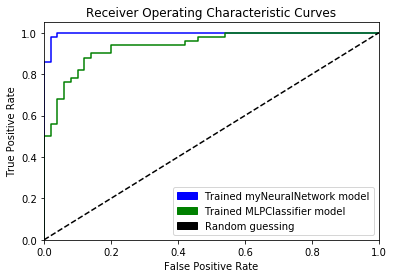

In [31]:
# plot the ROC curve for test data on myNN and MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier

# train the myNN model
clf_myNN = myNeuralNetwork(2,5,5,1,0.1)
clf_myNN.fit(train[0], train[1])

# plot the ROC curve
myNN_proba = clf_myNN.predict_proba(test[0])
fpr, tpr, _ = roc_curve(test[1], myNN_proba)
plt.plot(fpr, tpr, color = 'blue')

# train the MLPClassifier model
clf_skNN = MLPClassifier(hidden_layer_sizes=(5, 2), activation = 'logistic', solver = 'sgd', 
                        alpha = 0, learning_rate = 'constant', learning_rate_init = 0.1, max_iter = 500, 
                        shuffle = True, random_state = 100)
# , tol = 0.0001,momentum = 0, n_iter_no_change = 1
clf_skNN.fit(train[0], train[1])
skNN_proba = clf_skNN.predict_proba(test[0])
fpr, tpr, _ = roc_curve(test[1], skNN_proba[:, 1])
plt.plot(fpr, tpr, color = 'green')

# plot random guessing line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
blue_patch = patches.Patch(color='blue', label= f'Trained myNeuralNetwork model')
green_patch = patches.Patch(color='green', label= f'Trained MLPClassifier model')
black_patch = patches.Patch(color='black', label=f'Random guessing')
plt.legend(handles=[blue_patch, green_patch, black_patch])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

**(c)** Suggest two ways in which you neural network implementation could be improved.  
-> Other than weight, I can also add bias term for each weights to optimaize the neural network model.
Moreover, changing the definition of when the loss of the model converges might probably improve the model. I can tune it by changing how many times the difference of loss is less than a specific threshold to improve the performance of my neural newwork model.